# Majority Judgment test notebook

Francisco Förster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import re
import seaborn as sns
sns.set(style="whitegrid")
import sys

In [2]:
import sys
sys.path.append('lib')

In [3]:
from MJ import *

In [4]:
%load_ext autoreload
%autoreload 2

# Read input file

The format must be the same as returned in google forms: columns names are 

"question [option]"

In [5]:
df = pd.read_csv("Test form (Responses) - Form Responses 1.csv")
df.head()

,Timestamp,Other,Question 1 [Option 1],Question 1 [Option 2],Question 1 [Option 3],Question 1 [Option 4],Question 2 [Option 1],Question 2 [Option 2],Question 2 [Option 3],Question 2 [Option 4],Question 2 [Option 5],Question 2 [Option 6]
0,7/19/2023 20:49:29,a,Poor,Regular,Poor,Good,Regular,Good,Poor,Good,NaN,Very good
1,7/19/2023 20:49:43,b,Good,Regular,Good,Very good,Poor,Very good,Good,Regular,Good,Very good
2,7/19/2023 20:50:01,c,Poor,Very good,Excellent,Excellent,Very good,Regular,Excellent,Excellent,Good,Good
3,7/19/2023 20:50:15,d,Good,Very good,Good,Very good,Excellent,Good,Good,Very good,NaN,Good
4,7/19/2023 20:50:28,e,Regular,Very good,Good,Excellent,Excellent,Good,Regular,Good,Good,Very good


# Options and colors

Manually enter options in increasing order of evaluation as well as the colors to use

In [6]:
order = ["Poor", "Regular", "Good", "Very good", "Excellent"]
colors = ["gray", "yellow", "greenyellow", "limegreen", "forestgreen"]

# Majority Judgment object

Initialize MJ object

In [7]:
threshold = 50 # default value (majority rule)
myMJ = MJ(df, order, colors, threshold)

# Rank options for each available question

If small number of votes use fix=True.

## Wrong version: 

By default fix=False, but this can lead to errors when the number of votes is small.

Note that for Question 1 the raking is OK, but for question 2 the fast algorithm makes a mistake, since it places Option 6 below Option 1.

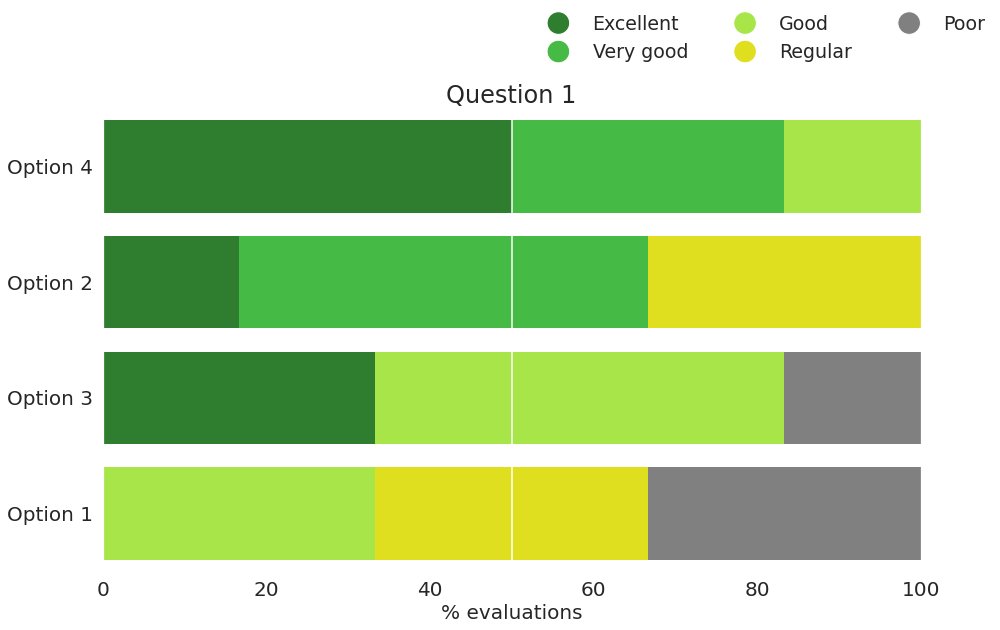

,perc_val,p,q,suffix,perc,Name,comp,0,1,2,3,4
Question 1 [Option 4],3.5,0.500000,0.500000,-1.0,Very good,Option 4,0.500000,100.0,100.000000,100.000000,83.333333,50.000000
Question 1 [Option 2],3.0,0.166667,0.333333,-1.0,Very good,Option 2,0.333333,100.0,100.000000,66.666667,66.666667,16.666667
Question 1 [Option 3],2.0,0.333333,0.166667,1.0,Good,Option 3,-0.333333,100.0,83.333333,83.333333,33.333333,33.333333
Question 1 [Option 1],1.0,0.333333,0.333333,-1.0,Regular,Option 1,0.333333,100.0,66.666667,33.333333,0.000000,0.000000


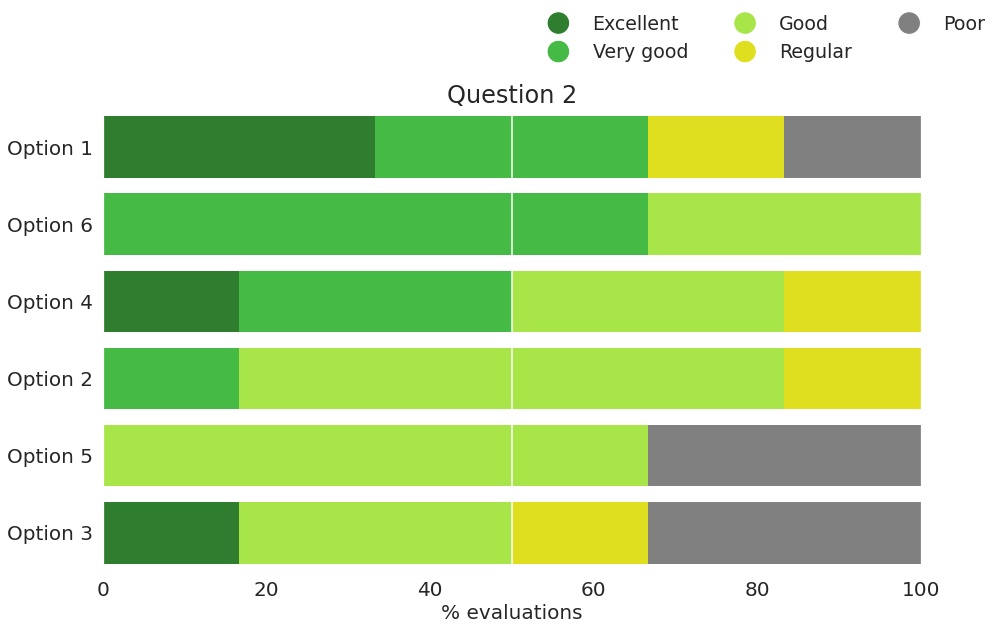

,perc_val,p,q,suffix,perc,Name,comp,0,1,2,3,4
Question 2 [Option 1],3.0,0.333333,0.333333,-1.0,Very good,Option 1,0.333333,100.0,83.333333,66.666667,66.666667,33.333333
Question 2 [Option 6],3.0,0.000000,0.333333,-1.0,Very good,Option 6,0.333333,100.0,100.000000,100.000000,66.666667,0.000000
Question 2 [Option 4],2.5,0.500000,0.500000,-1.0,Good,Option 4,0.500000,100.0,100.000000,83.333333,50.000000,16.666667
Question 2 [Option 2],2.0,0.166667,0.166667,-1.0,Good,Option 2,0.166667,100.0,100.000000,83.333333,16.666667,0.000000
Question 2 [Option 5],2.0,0.000000,0.333333,-1.0,Good,Option 5,0.333333,100.0,66.666667,66.666667,0.000000,0.000000
Question 2 [Option 3],1.5,0.500000,0.500000,-1.0,Regular,Option 3,0.500000,100.0,66.666667,50.000000,16.666667,16.666667


In [19]:
myMJ.sortMJall()

## Correct version:

If we had removed the two Very Good votes for options 1 and 6, the lowest middlemost vote would be Regular for Option 1 and Good for Option 6. Thus, Option 6 should be first. We can fix this kind of problems, that can occur when there are evaluations with no examples for a given option, by using a manual fix. This manual fix checks that the options are OK removing individual votes by hand in the case of a draw.

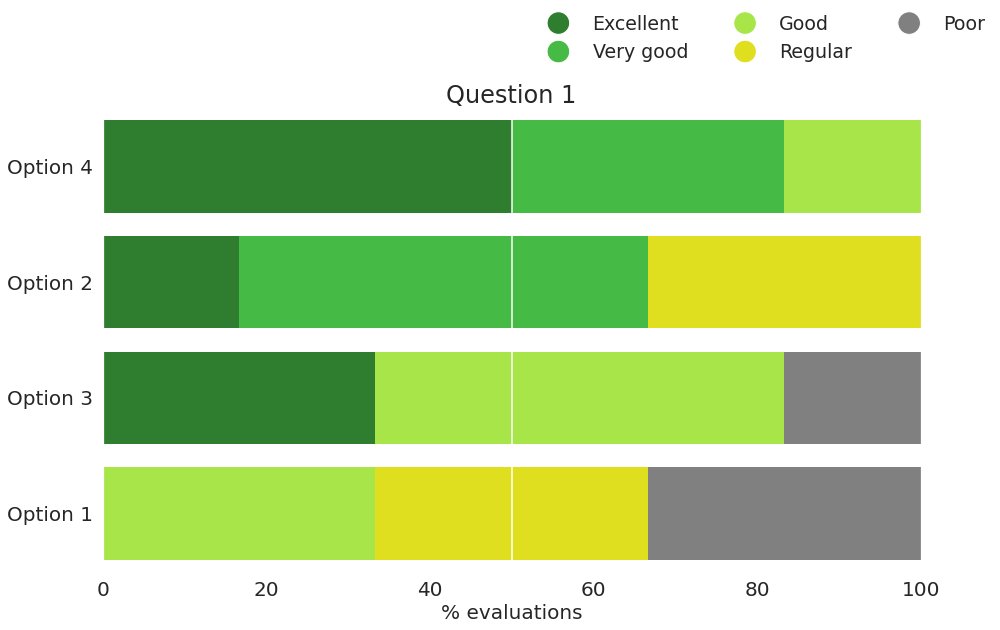

,perc_val,p,q,suffix,perc,Name,comp,0,1,2,3,4
Question 1 [Option 4],3.5,0.500000,0.500000,-1.0,Very good,Option 4,0.500000,100.0,100.000000,100.000000,83.333333,50.000000
Question 1 [Option 2],3.0,0.166667,0.333333,-1.0,Very good,Option 2,0.333333,100.0,100.000000,66.666667,66.666667,16.666667
Question 1 [Option 3],2.0,0.333333,0.166667,1.0,Good,Option 3,-0.333333,100.0,83.333333,83.333333,33.333333,33.333333
Question 1 [Option 1],1.0,0.333333,0.333333,-1.0,Regular,Option 1,0.333333,100.0,66.666667,33.333333,0.000000,0.000000


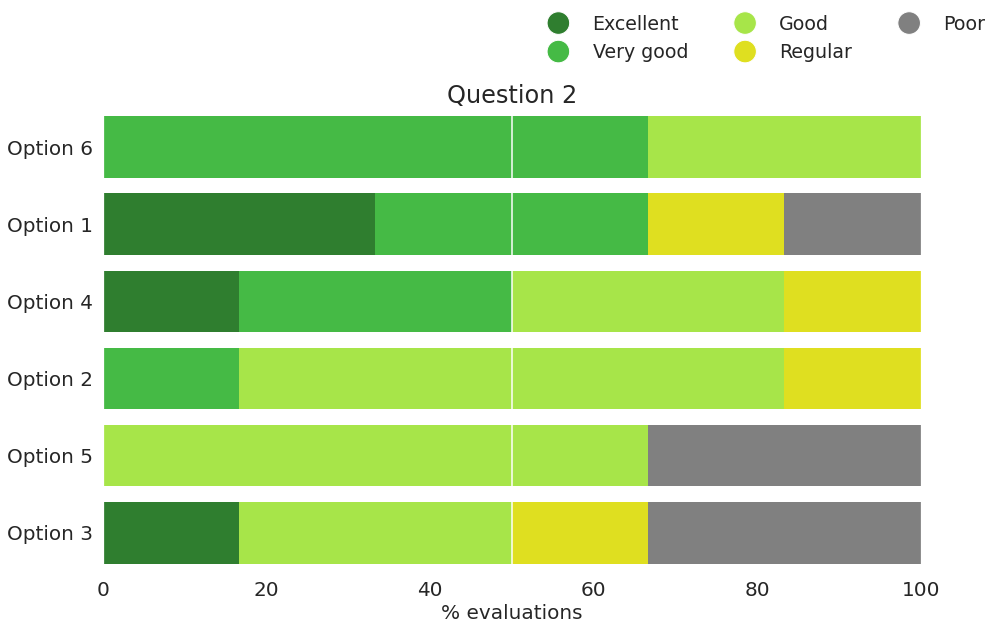

,perc_val,p,q,suffix,perc,Name,comp,0,1,2,3,4
Question 2 [Option 6],3.0,0.0,0.333333,-1.0,Very good,Option 6,0.333333,100.0,100.000000,100.000000,66.666667,0.000000
Question 2 [Option 1],3.0,0.333333,0.333333,-1.0,Very good,Option 1,0.333333,100.0,83.333333,66.666667,66.666667,33.333333
Question 2 [Option 4],2.5,0.5,0.5,-1.0,Good,Option 4,0.5,100.0,100.000000,83.333333,50.000000,16.666667
Question 2 [Option 2],2.0,0.166667,0.166667,-1.0,Good,Option 2,0.166667,100.0,100.000000,83.333333,16.666667,0.000000
Question 2 [Option 5],2.0,0.0,0.333333,-1.0,Good,Option 5,0.333333,100.0,66.666667,66.666667,0.000000,0.000000
Question 2 [Option 3],1.5,0.5,0.5,-1.0,Regular,Option 3,0.5,100.0,66.666667,50.000000,16.666667,16.666667


In [20]:
myMJ.sortMJall(fix=True)

You can check the comparison being made by using verbose=True

Question 1 [Option 1]
   p=0.333, Regular-, q=0.333
Question 1 [Option 2]
   p=0.167, Very good-, q=0.333
Question 1 [Option 3]
   p=0.333, Good+, q=0.167
Question 1 [Option 4]
   p=0.500, Very good-, q=0.500
[2 3 3 4 4 4] [1 1 3 3 3 4]
--> [2 3 4 4 4] [1 1 3 3 4]
[1 1 3 3 3 4] [0 2 2 2 4 4]
[0 2 2 2 4 4] [0 0 1 1 2 2]


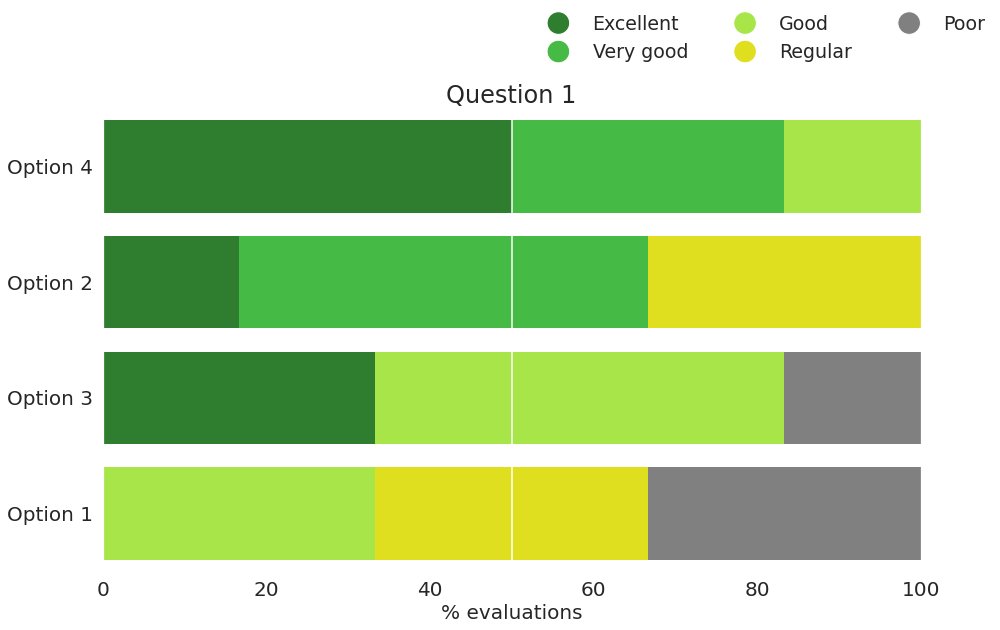

,perc_val,p,q,suffix,perc,Name,comp,0,1,2,3,4
Question 1 [Option 4],3.5,0.500000,0.500000,-1.0,Very good,Option 4,0.500000,100.0,100.000000,100.000000,83.333333,50.000000
Question 1 [Option 2],3.0,0.166667,0.333333,-1.0,Very good,Option 2,0.333333,100.0,100.000000,66.666667,66.666667,16.666667
Question 1 [Option 3],2.0,0.333333,0.166667,1.0,Good,Option 3,-0.333333,100.0,83.333333,83.333333,33.333333,33.333333
Question 1 [Option 1],1.0,0.333333,0.333333,-1.0,Regular,Option 1,0.333333,100.0,66.666667,33.333333,0.000000,0.000000


Question 2 [Option 1]
   p=0.333, Very good-, q=0.333
Question 2 [Option 2]
   p=0.167, Good-, q=0.167
Question 2 [Option 3]
   p=0.500, Regular-, q=0.500
Question 2 [Option 4]
   p=0.500, Good-, q=0.500
Question 2 [Option 5]
   p=0.000, Good-, q=0.333
Question 2 [Option 6]
   p=0.000, Very good-, q=0.333
[0 1 3 3 4 4] [2 2 3 3 3 3]
--> [0 1 3 4 4] [2 2 3 3 3]
--> [0 1 4 4] [2 2 3 3]
--> Warning: Option 1, Option 6
[2 2 3 3 3 3] [0 1 3 3 4 4]
--> [2 2 3 3 3] [0 1 3 4 4]
--> [2 2 3 3] [0 1 4 4]
[0 1 3 3 4 4] [1 2 2 3 3 4]
[1 2 2 3 3 4] [1 2 2 2 2 3]
--> [1 2 3 3 4] [1 2 2 2 3]
[1 2 2 2 2 3] [0 0 2 2 2 2]
--> [1 2 2 2 3] [0 0 2 2 2]
--> [1 2 2 3] [0 0 2 2]
[0 0 2 2 2 2] [0 0 1 2 2 4]


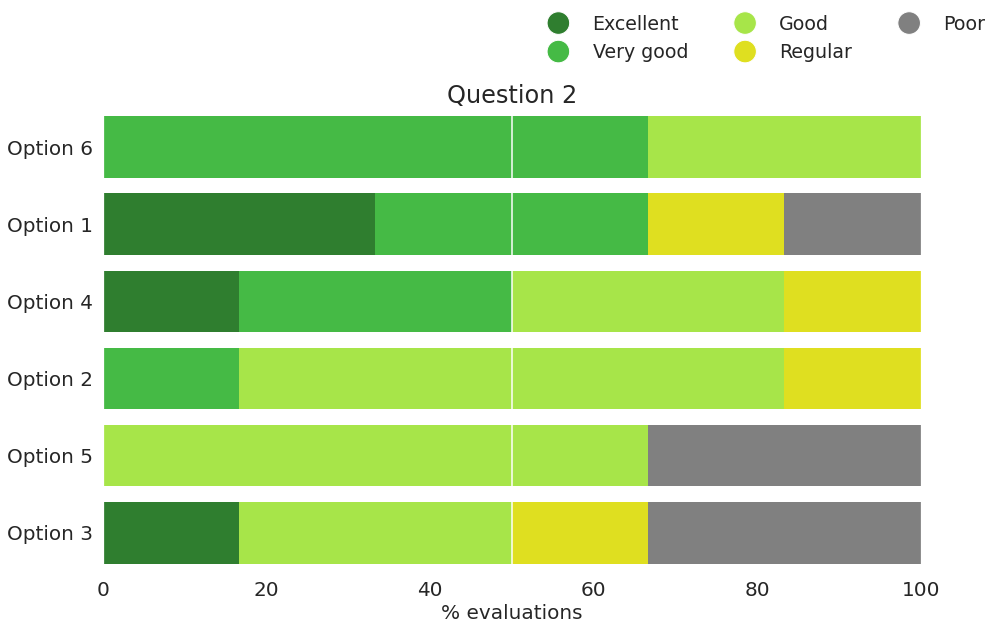

,perc_val,p,q,suffix,perc,Name,comp,0,1,2,3,4
Question 2 [Option 6],3.0,0.0,0.333333,-1.0,Very good,Option 6,0.333333,100.0,100.000000,100.000000,66.666667,0.000000
Question 2 [Option 1],3.0,0.333333,0.333333,-1.0,Very good,Option 1,0.333333,100.0,83.333333,66.666667,66.666667,33.333333
Question 2 [Option 4],2.5,0.5,0.5,-1.0,Good,Option 4,0.5,100.0,100.000000,83.333333,50.000000,16.666667
Question 2 [Option 2],2.0,0.166667,0.166667,-1.0,Good,Option 2,0.166667,100.0,100.000000,83.333333,16.666667,0.000000
Question 2 [Option 5],2.0,0.0,0.333333,-1.0,Good,Option 5,0.333333,100.0,66.666667,66.666667,0.000000,0.000000
Question 2 [Option 3],1.5,0.5,0.5,-1.0,Regular,Option 3,0.5,100.0,66.666667,50.000000,16.666667,16.666667


In [26]:
myMJ.sortMJall(fix=True, verbose=True)